**Exploratory Data Analysis:**

***Aspiring Mind Employment Outcome 2015 (AMEO):***

*Data Description:*
The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO).
The study is primarily limited only to students with engineering disciplines.
The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills.
The dataset also contains demographic features. The dataset contains around 40 independent variables and 4000 data points.
The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate.

*Objective:*
To import the data and extract basic information
Find outliers
To perform univariate and bivariate analysis and take down observations
To test the data based on research questions
Make conclusions based on observations

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from scipy.stats import norm

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
pwd

'C:\\Users\\dubey'

In [8]:
am_df = pd.read_excel('aspiring_minds_employability_outcomes_2015.xlsx')

In [9]:
am_df

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [10]:
am_df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [11]:
print(am_df.shape)

am_df.head()

(3998, 39)


,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [12]:
am_df.tail()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
3993,train,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943
3997,train,324966,400000,2013-02-01,present,senior systems engineer,Chennai,f,1991-02-26,70.60,...,-1,-1,-1,-1,-1,-1.1128,-0.2793,-0.6343,1.32553,-0.6035


In [13]:
am_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [14]:
am_df.describe(include='all')

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3998,3.998000e+03,3.998000e+03,3998,3998,3998,3998,3998,3998,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
unique,1,NaN,NaN,81,67,419,339,2,1872,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,train,NaN,NaN,2014-07-01 00:00:00,present,software engineer,Bangalore,m,1991-01-01 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3998,NaN,NaN,199,1875,539,627,3041,11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,1991-06-01 00:00:00,NaN,NaN,NaN,NaN,1977-10-30 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2015-12-01 00:00:00,NaN,NaN,NaN,NaN,1997-05-27 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,6.637945e+05,3.076998e+05,NaN,NaN,NaN,NaN,NaN,NaN,77.925443,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,NaN,3.632182e+05,2.127375e+05,NaN,NaN,NaN,NaN,NaN,NaN,9.850162,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,NaN,1.124400e+04,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,43.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,NaN,3.342842e+05,1.800000e+05,NaN,NaN,NaN,NaN,NaN,NaN,71.680000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200


In [15]:
pd.set_option('display.float_format',lambda x:'%.3f' % x)

In [16]:
am1 = am_df.describe()
am1

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,...,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000,3998.000
mean,663794.541,307699.850,77.925,2008.088,74.466,5156.851,1.926,71.486,5156.851,0.300,...,90.742,22.975,16.479,31.851,2.684,-0.038,0.146,0.003,-0.169,-0.138
std,363218.246,212737.500,9.850,1.654,11.000,4802.261,0.262,8.167,4802.261,0.458,...,175.273,98.123,87.586,104.853,36.659,1.029,0.942,0.951,1.008,1.008
min,11244.000,35000.000,43.000,1995.000,40.000,2.000,1.000,6.450,2.000,0.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-4.127,-5.782,-4.601,-2.643,-7.376
25%,334284.250,180000.000,71.680,2007.000,66.000,494.000,2.000,66.407,494.000,0.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-0.714,-0.287,-0.605,-0.868,-0.669
50%,639600.000,300000.000,79.150,2008.000,74.400,3879.000,2.000,71.720,3879.000,0.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,0.046,0.212,0.091,-0.234,-0.094
75%,990480.000,370000.000,85.670,2009.000,82.600,8818.000,2.000,76.328,8818.000,1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,0.703,0.813,0.672,0.526,0.502
max,1298275.000,4000000.000,97.760,2013.000,98.700,18409.000,2.000,99.930,18409.000,1.000,...,715.000,623.000,676.000,548.000,516.000,1.995,1.905,2.535,3.353,1.822


In [17]:
am_df.describe(include='object')

,Unnamed: 0,DOL,Designation,JobCity,Gender,10board,12board,Degree,Specialization,CollegeState
count,3998,3998,3998,3998,3998,3998,3998,3998,3998,3998
unique,1,67,419,339,2,275,340,4,46,26
top,train,present,software engineer,Bangalore,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh
freq,3998,1875,539,627,3041,1395,1400,3700,880,915


In [18]:
am_df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [19]:
am_df.nunique()

Unnamed: 0                  1
ID                       3998
Salary                    177
DOJ                        81
DOL                        67
Designation               419
JobCity                   339
Gender                      2
DOB                      1872
10percentage              851
10board                   275
12graduation               16
12percentage              801
12board                   340
CollegeID                1350
CollegeTier                 2
Degree                      4
Specialization             46
collegeGPA               1282
CollegeCityID            1350
CollegeCityTier             2
CollegeState               26
GraduationYear             11
English                   111
Logical                   107
Quant                     138
Domain                    243
ComputerProgramming        79
ElectronicsAndSemicon      29
ComputerScience            20
MechanicalEngg             42
ElectricalEngg             31
TelecomEngg                26
CivilEngg 

In [20]:
am_df.groupby(['Designation']).count()

,Unnamed: 0,ID,Salary,DOJ,DOL,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Designation,,,,,,,,,,,,,,,,,,,,,
.net developer,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
.net web developer,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
account executive,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
account manager,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
admin assistant,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
web designer and seo,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
web developer,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,54,54,54
web intern,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [21]:
state = am_df.groupby(['CollegeState']).count()
state

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
CollegeState,,,,,,,,,,,,,,,,,,,,,
Andhra Pradesh,225,225,225,225,225,225,225,225,225,225,...,225,225,225,225,225,225,225,225,225,225
Assam,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
Bihar,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
Chhattisgarh,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
Delhi,162,162,162,162,162,162,162,162,162,162,...,162,162,162,162,162,162,162,162,162,162
Goa,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Gujarat,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
Haryana,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180
Himachal Pradesh,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16


In [22]:
am_df.groupby(['JobCity']).count()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
JobCity,,,,,,,,,,,,,,,,,,,,,
-1,461,461,461,461,461,461,461,461,461,461,...,461,461,461,461,461,461,461,461,461,461
Chennai,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Delhi,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Mumbai,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Pune,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
trivandrum,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
udaipur,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
vapi,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [23]:
# only year is retained from DOB column
am_df['DOB']=pd.to_datetime(am_df['DOB'])
am_df['Dyear']=am_df['DOB'].dt.year
am_df.drop(columns=['DOB'],axis=1,inplace=True)

am_df['12graduation']=pd.to_datetime(am_df['12graduation'])
am_df['12gyear']=am_df['12graduation'].dt.year
am_df.drop(columns=['12graduation'],axis=1,inplace=True)

am_df['GraduationYear']=pd.to_datetime(am_df['GraduationYear'])
am_df['gyear']=am_df['GraduationYear'].dt.year
am_df.drop(columns=['GraduationYear'],axis=1,inplace=True)

am_df['12GradAge']=abs(am_df['12gyear']-am_df['Dyear'])
am_df['GradAge']=abs(am_df['gyear']-am_df['Dyear'])

In [24]:
# finding null values
am_df.isin([-1, 'NaN']).sum()

Unnamed: 0                  0
ID                          0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                   461
Gender                      0
10percentage                0
10board                     0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier             0
CollegeState                0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscientiousness           0
agreeableness               0
extraversi

**UNIVARIATE ANALYSIS**

<AxesSubplot:title={'center':'Frequency dist of Gender'}>

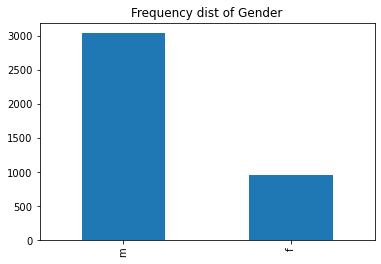

In [25]:
# frequency of gender
am_df['Gender'].value_counts().plot.bar(title='Frequency dist of Gender')

<AxesSubplot:title={'center':'Frequency dist of Designation'}>

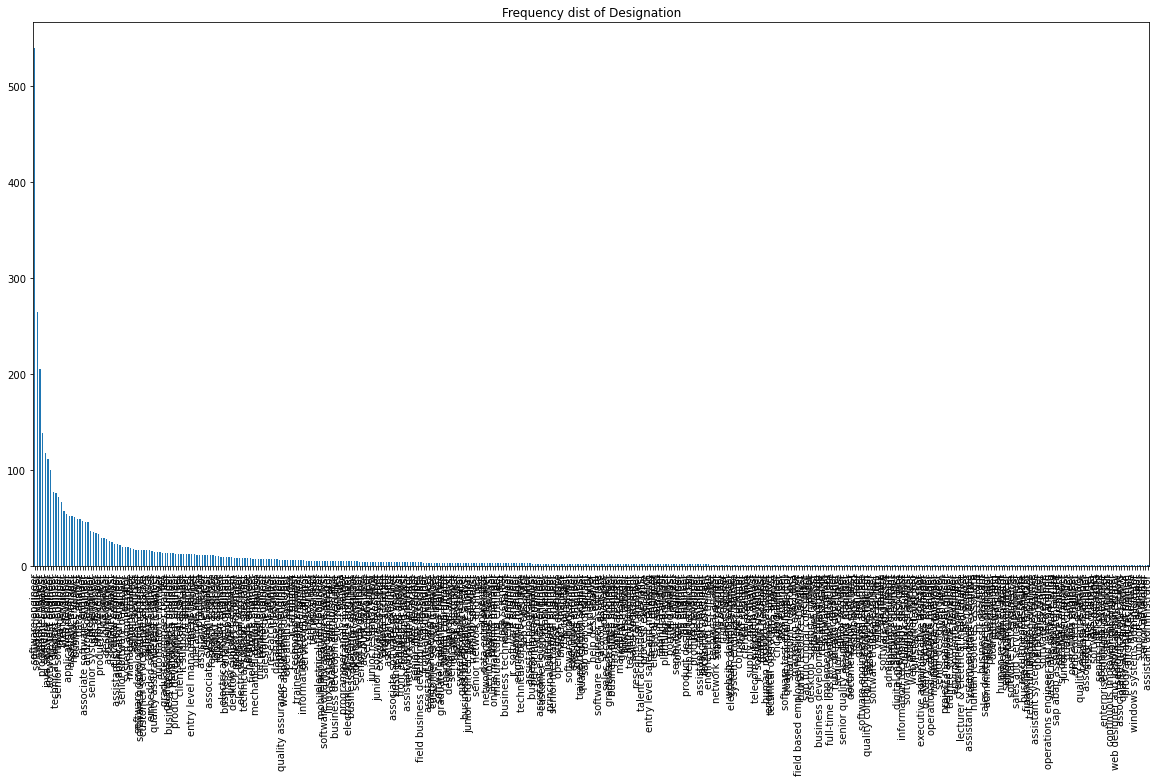

In [26]:
#Frequency dist of Designation
am_df['Designation'].value_counts().plot(kind = 'bar',title='Frequency dist of Designation' ,figsize = (20,10))

<AxesSubplot:title={'center':'Frequency dist of CollegeState'}>

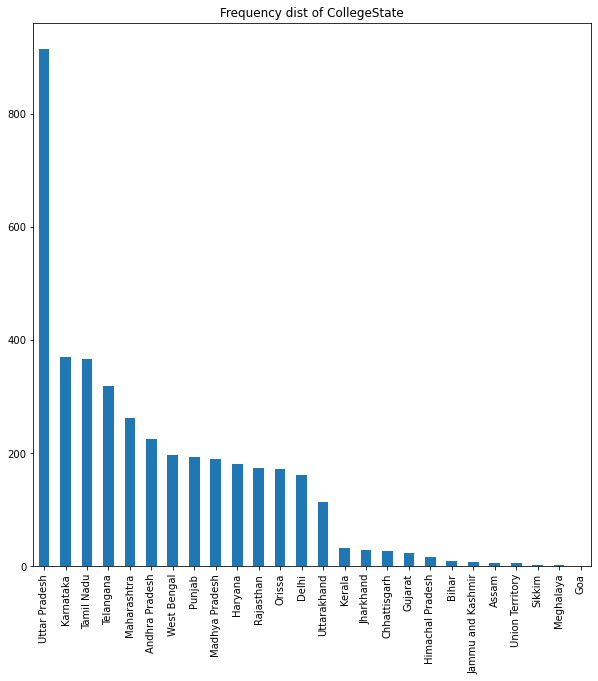

In [27]:
#Frequency dist of CollegeState
am_df['CollegeState'].value_counts().plot(kind = 'bar',title='Frequency dist of CollegeState' ,figsize = (10,10))

<AxesSubplot:title={'center':'Frequency dist of Specialization'}>

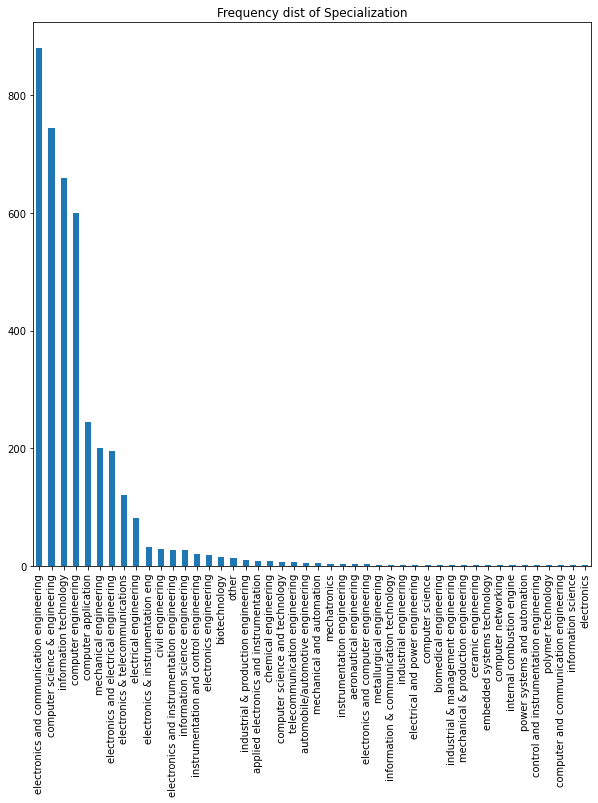

In [28]:
#Frequency dist of Specialization
am_df['Specialization'].value_counts().plot(kind = 'bar',title='Frequency dist of Specialization' ,figsize = (10,10))

<AxesSubplot:ylabel='Frequency'>

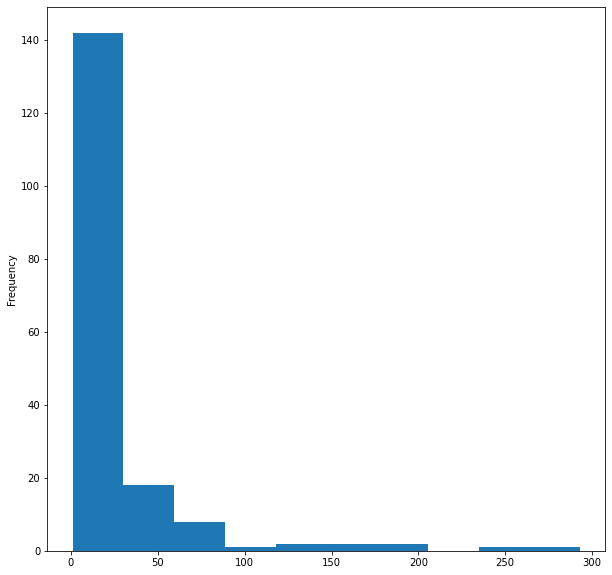

In [29]:
#frequency of salary
sal = am_df['Salary'].value_counts()
sal.plot(kind="hist",figsize=(10,10))

In [32]:
#frequency of date of birth
plt.hist(am_df['DOB'])
plt.show

KeyError: 'DOB'

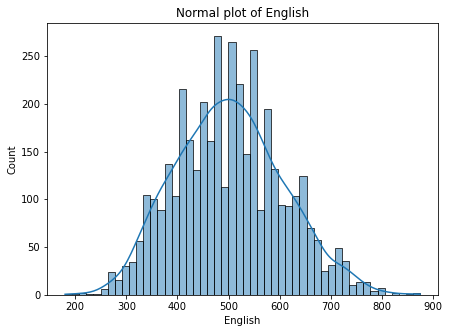

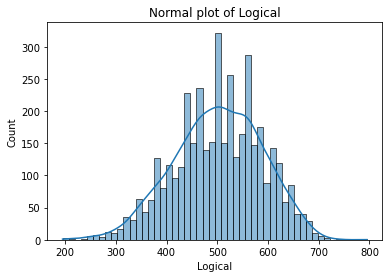

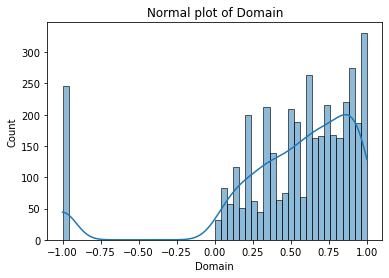

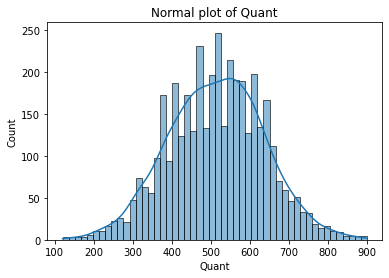

In [33]:
#AMCAT skills scores - histplot
plt.subplots(figsize=(7,5))
sns.histplot(am_df['English'], bins = 50, kde=True)
plt.title('Normal plot of English')
plt.show()
sns.histplot(am_df['Logical'], bins = 50, kde=True)
plt.title('Normal plot of Logical')
plt.show()
sns.histplot(am_df['Domain'], bins = 50, kde=True)
plt.title('Normal plot of Domain')
plt.show()
sns.histplot(am_df['Quant'], bins = 50, kde=True)
plt.title('Normal plot of Quant')
plt.show()

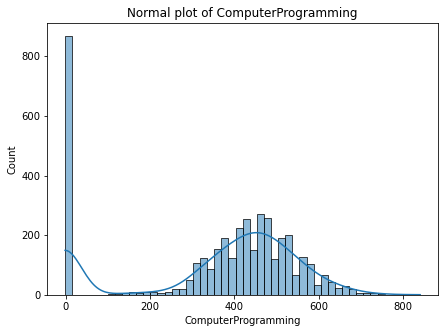

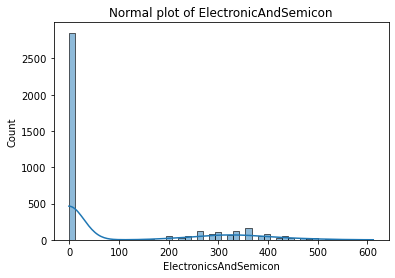

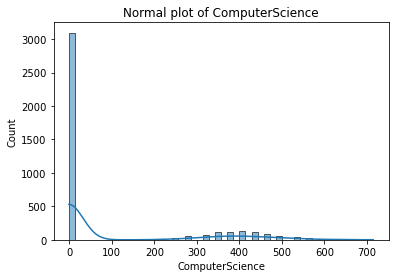

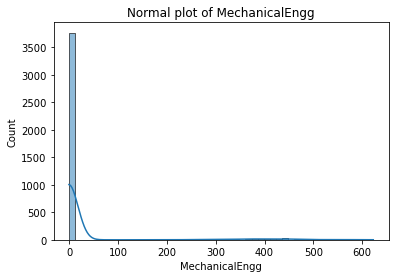

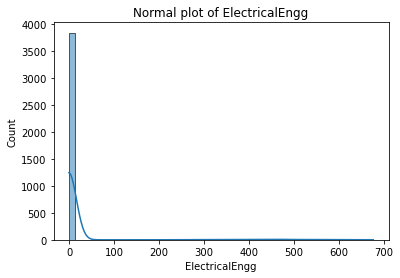

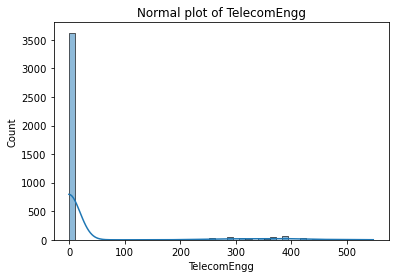

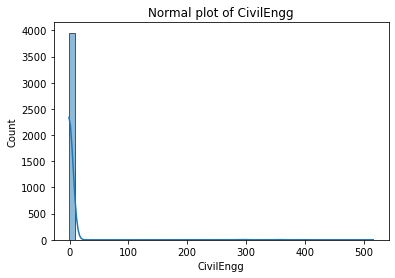

In [34]:
#AMCAT engineering section scores - histplot
plt.subplots(figsize=(7,5))
sns.histplot(am_df['ComputerProgramming'], bins = 50, kde=True)
plt.title('Normal plot of ComputerProgramming')
plt.show()
sns.histplot(am_df['ElectronicsAndSemicon'], bins = 50, kde=True)
plt.title('Normal plot of ElectronicAndSemicon')
plt.show()
sns.histplot(am_df['ComputerScience'], bins = 50, kde=True)
plt.title('Normal plot of ComputerScience')
plt.show()
sns.histplot(am_df['MechanicalEngg'], bins = 50, kde=True)
plt.title('Normal plot of MechanicalEngg')
plt.show()
sns.histplot(am_df['ElectricalEngg'], bins = 50, kde=True)
plt.title('Normal plot of ElectricalEngg')
plt.show()
sns.histplot(am_df['TelecomEngg'], bins = 50, kde=True)
plt.title('Normal plot of TelecomEngg')
plt.show()
sns.histplot(am_df['CivilEngg'], bins = 50, kde=True)
plt.title('Normal plot of CivilEngg')
plt.show()

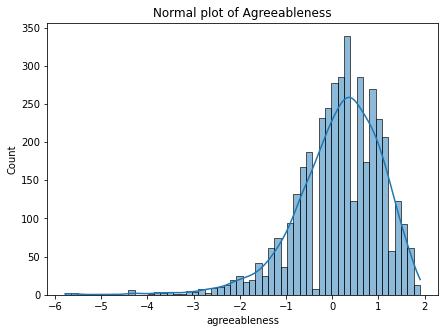

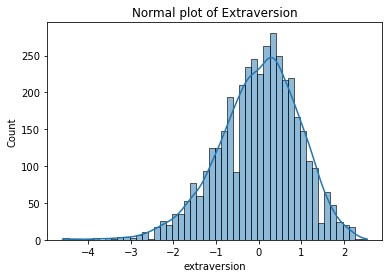

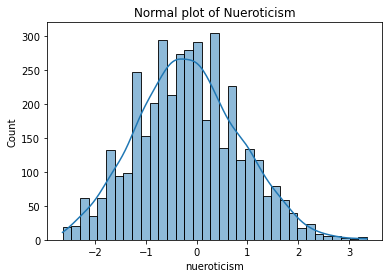

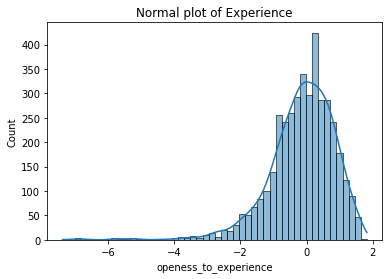

In [35]:
#AMCAT personality test scores - histplot
plt.subplots(figsize=(7,5))
sns.histplot(x = 'agreeableness', data = am_df, kde=True)
plt.title('Normal plot of Agreeableness')
plt.show()
sns.histplot(am_df['extraversion'], bins = 50, kde=True)
plt.title('Normal plot of Extraversion')
plt.show()
sns.histplot(x='nueroticism', data = am_df, kde=True)
plt.title('Normal plot of Nueroticism')
plt.show()
sns.histplot(am_df['openess_to_experience'], bins = 50, kde=True)
plt.title('Normal plot of Experience')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

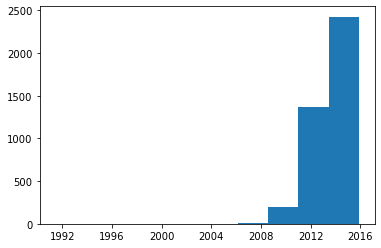

In [36]:
plt.hist(am_df['DOJ'])
plt.show

**Observations:**

Most of the students selected are males

Most of the candidates are software engineers

The city with most jobs is bangalore

The students are mostly from colleges in Uttar Pradesh

Most of the candidates specialize in electronics and communication engineering

Highest salary is 4000000.

Average salary is 307699.850

Most of the candidates were born in 1992-1994

AMCAT skills scores distributions are all normal except for domain

AMCAT engineering section scores are distributed same in all sections as right skewed.

AMCAT personality scores are mostly left skewed

In the years 2014-2016 the candidates have joined the most

**Bivariate Analysis:**

***Relationships between numerical columns:***

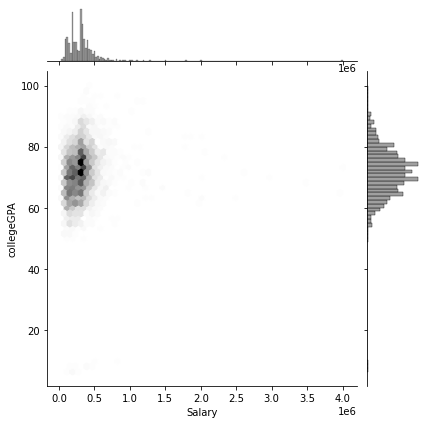

In [38]:
# Visualisation of salary based on collegeGPA
sns.jointplot(x='Salary', y='collegeGPA', data=am_df, kind='hex', color='grey')

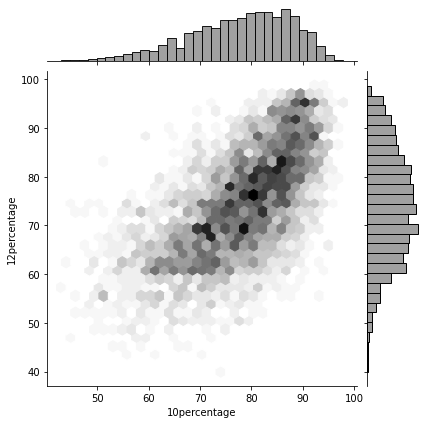

In [39]:
#Visualization of 10percentage and 12th percentage
sns.jointplot(x='10percentage', y='12percentage', data=am_df, kind='hex', color='grey')

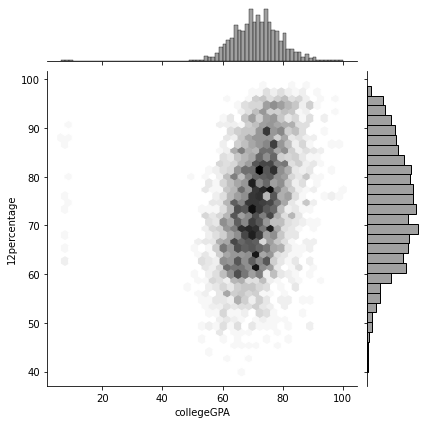

In [40]:
# visualiztion of college GPA and 12 percentage
sns.jointplot(x='collegeGPA', y='12percentage', data=am_df, kind='hex', color='grey')

**Patterns between categorical and numerical columns:**

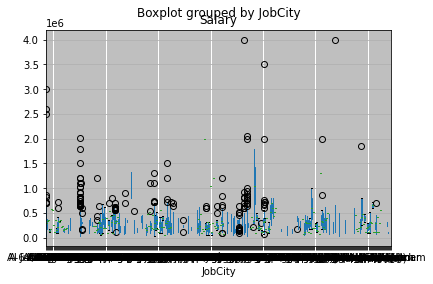

In [41]:
#visualization of pattern between salary and jobcity
am_df.boxplot(column='Salary', by='JobCity')
plt.show()

<AxesSubplot:xlabel='Salary', ylabel='Designation'>

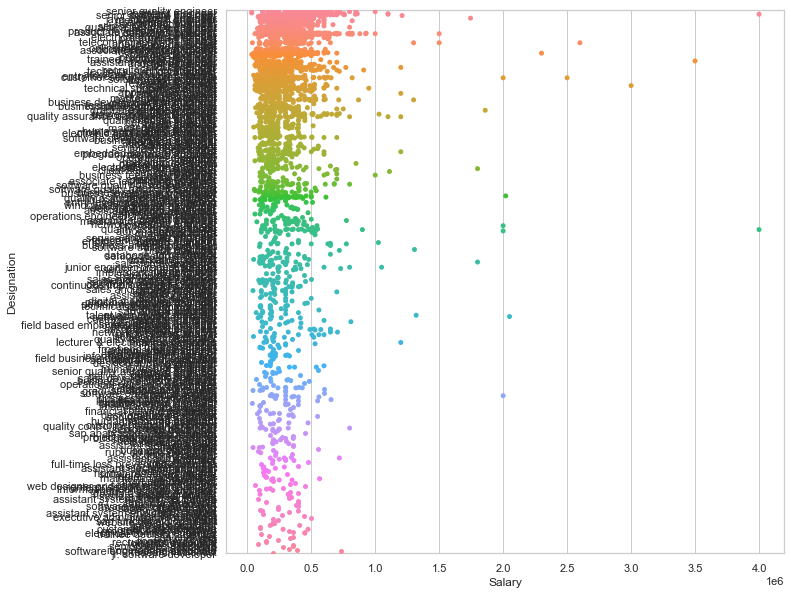

In [44]:
#visualization of pattern between salary and Designation
plt.subplots(figsize=(10,10))
sns.set(style="whitegrid")
sns.swarmplot(x='Salary', y='Designation', data=am_df)

<AxesSubplot:xlabel='Salary', ylabel='Gender'>

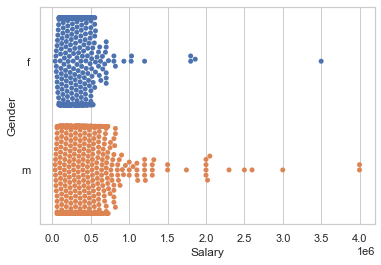

In [45]:
#visualization of pattern between salary and Gender
sns.set(style="whitegrid")
sns.swarmplot(x='Salary', y='Gender', data=am_df)

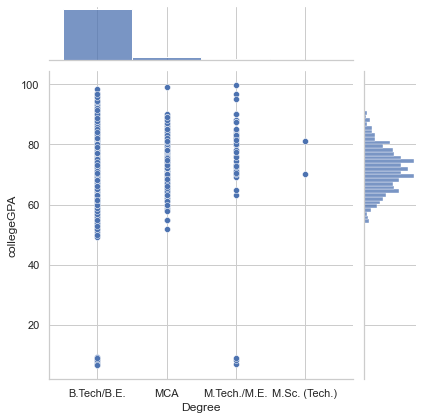

In [46]:
#visualization of pattern between Degree and CollegeGPA
sns.jointplot(x=am_df['Degree'], y=am_df['collegeGPA'], data = am_df, kind = 'scatter')

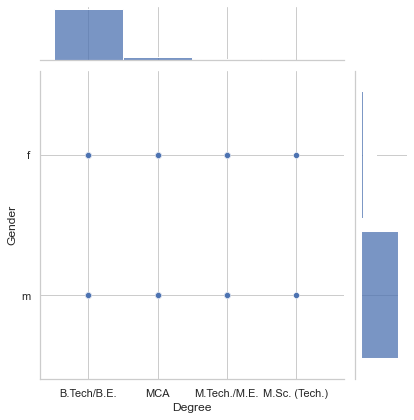

In [47]:
#visualization of pattern between Degree and Gender
sns.jointplot(x=am_df['Degree'], y=am_df['Gender'], data = am_df, kind = 'scatter')

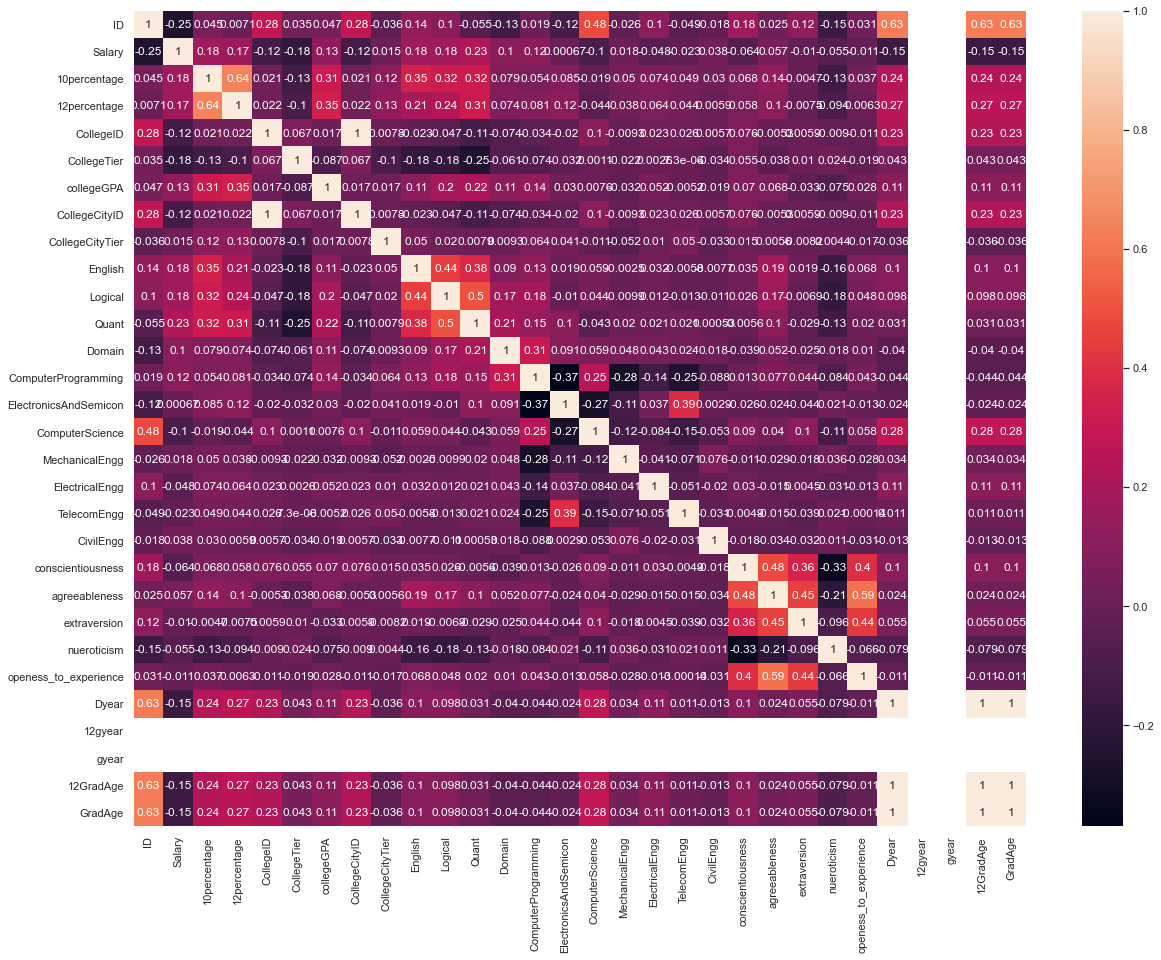

In [48]:
#Correlation between various columns
plt.figure(figsize=(20,15))
corrMatrix = am_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

<Figure size 432x288 with 0 Axes>

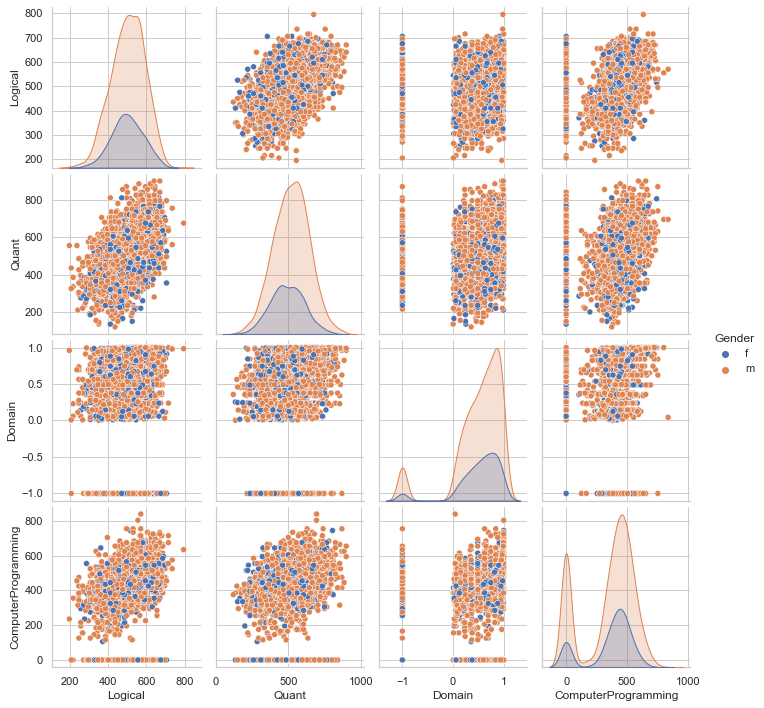

In [49]:
#Pair plot to vizualize pattern of AMCAT skills scores based on gender
plt.figure()
cols_to_plot = am_df.columns[21:25].tolist() + ['Gender'] 
sns.pairplot(am_df[cols_to_plot], hue ="Gender", diag_kind='kde' )
plt.show()

<Figure size 432x288 with 0 Axes>

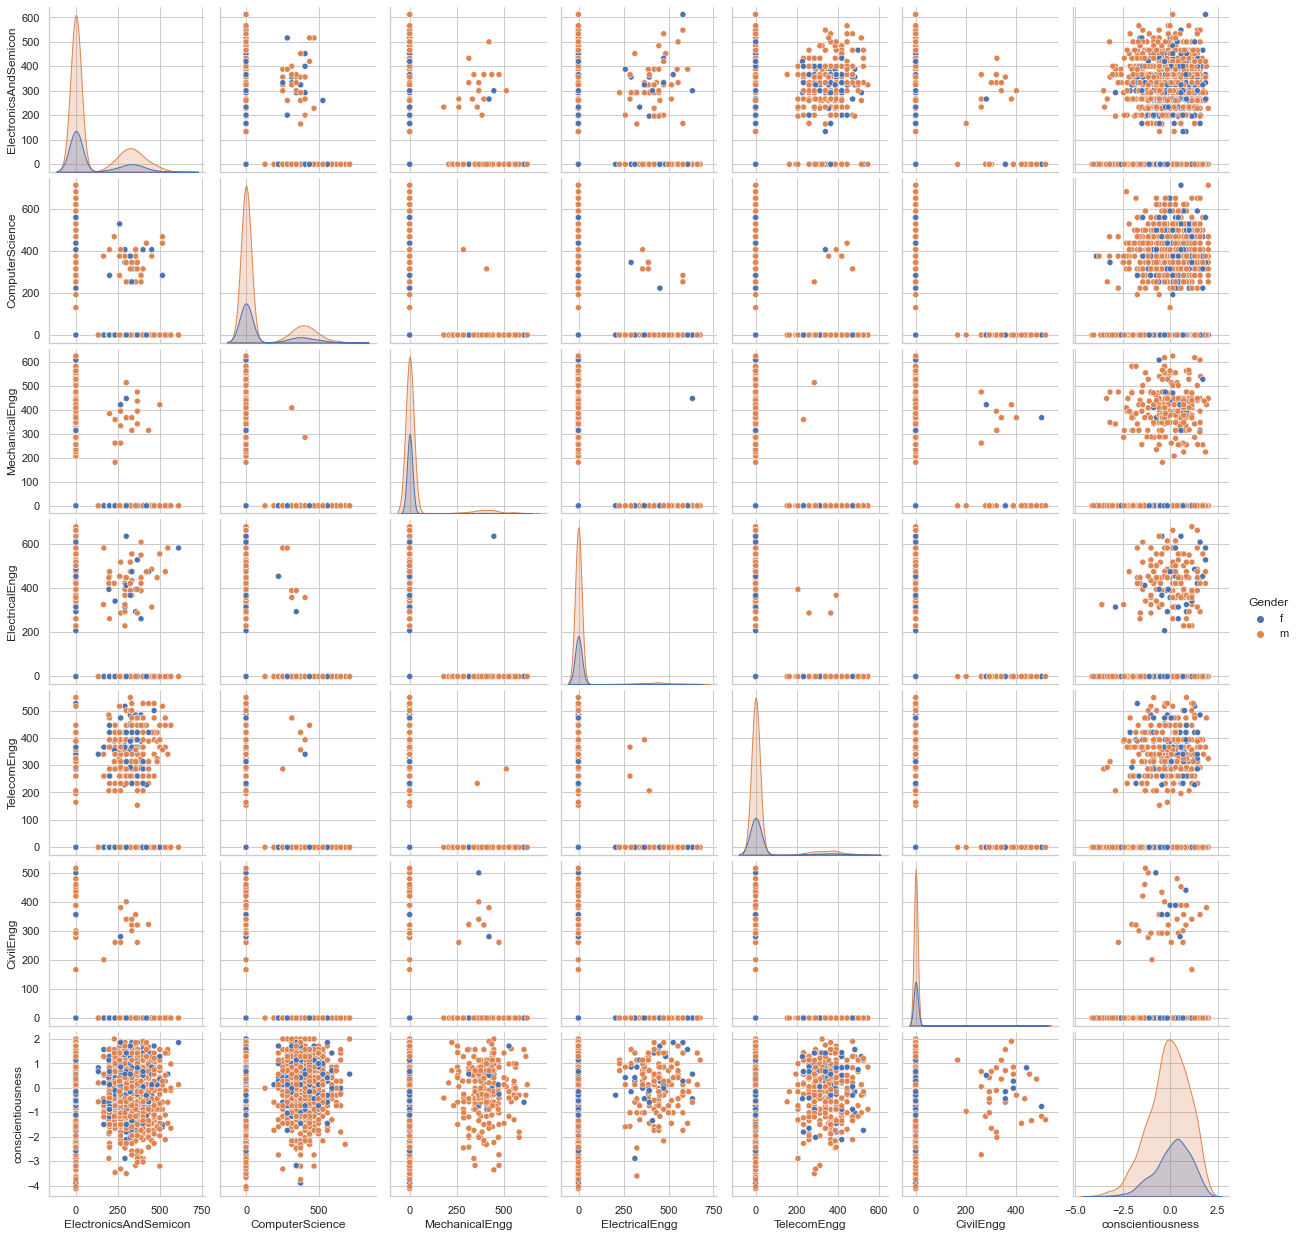

In [50]:
#Pair plot to vizualize pattern of AMCAT engineering section scores based on gender
plt.figure()
cols_to_plot = am_df.columns[25:32].tolist() + ['Gender'] 
sns.pairplot(am_df[cols_to_plot], hue ="Gender",diag_kind='kde' )
plt.show()

<Figure size 432x288 with 0 Axes>

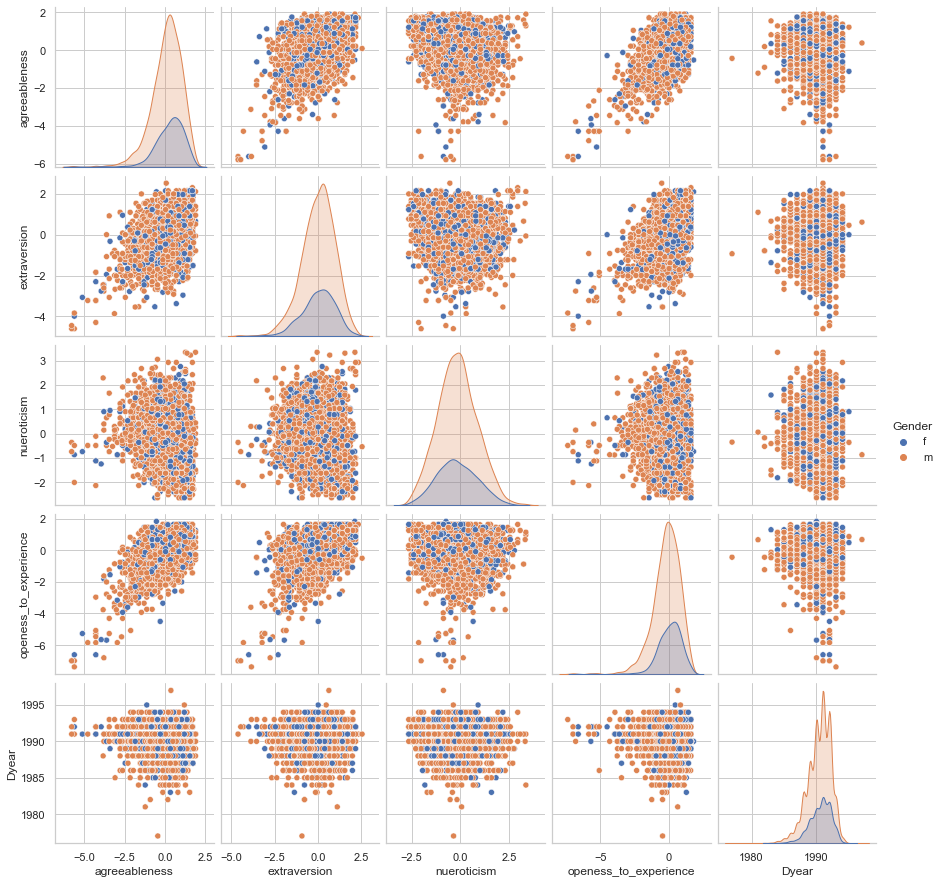

In [51]:
#Pair plot to vizualize pattern of AMCAT personality scores based on gender
plt.figure()
cols_to_plot = am_df.columns[32:37].tolist() + ['Gender'] 
sns.pairplot(am_df[cols_to_plot], hue ="Gender",diag_kind='kde' )
plt.show()

**Observations:**

The salary shows most to students with college GPA of 75%

The canditates hired mostly scored 75% in 10th , 12th and college

The salary doesnt vary depending on city

Senior quality engineers have high salary comparitively

The salary is mostly same for both males and females except for few higher outliers are observed in male category. 

Indicating that salaries above normal are earned more by males.

BTech/B.E students have more college GPA


There are both male and female students equally in degree
correlation map shows correlation between different columns in the data

In AMCAT skills scores both genders have almost same average

In AMCAT engineering section scores males have more score

In AMCAT personality scores test both genders have equal scores on average

**Research Question:**

Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.Is there a relationship between gender and specialisation? (i.e. Does the preference of Specialisation depend on the Gender?)

There are two parts in this question

*1)*To test the claim between salary and specialization

*2)*To check if specialization depends on gender.

<AxesSubplot:xlabel='ComputerProgramming', ylabel='Salary'>

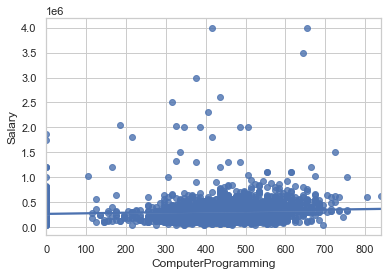

In [52]:
#positive correlation between salary and computer programming skills
sns.regplot(x='ComputerProgramming', y='Salary', data=am_df)

In [53]:
specialization_map = \
{'electronics and communication engineering' : 'EC',
 'computer science & engineering' : 'CS',
 'information technology' : 'CS' ,
 'computer engineering' : 'CS',
 'computer application' : 'CS',
 'mechanical engineering' : 'ME',
 'electronics and electrical engineering' : 'EC',
 'electronics & telecommunications' : 'EC',
 'electrical engineering' : 'EL',
 'electronics & instrumentation eng' : 'EC',
 'civil engineering' : 'CE',
 'electronics and instrumentation engineering' : 'EC',
 'information science engineering' : 'CS',
 'instrumentation and control engineering' : 'EC',
 'electronics engineering' : 'EC',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'EC',
 'computer science and technology' : 'CS',
 'telecommunication engineering' : 'EC',
 'mechanical and automation' : 'ME',
 'automobile/automotive engineering' : 'ME',
 'instrumentation engineering' : 'EC',
 'mechatronics' : 'ME',
 'electronics and computer engineering' : 'CS',
 'aeronautical engineering' : 'ME',
 'computer science' : 'CS',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'EC',
 'electrical and power engineering' : 'EL',
 'industrial & management engineering' : 'other',
 'computer networking' : 'CS',
 'embedded systems technology' : 'EC',
 'power systems and automation' : 'EL',
 'computer and communication engineering' : 'CS',
 'information science' : 'CS',
 'internal combustion engine' : 'ME',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'ME',
 'control and instrumentation engineering' : 'EC',
 'polymer technology' : 'other',
 'electronics' : 'EC'}

['CS' 'EC' 'ME' 'EL' 'CE' 'other']


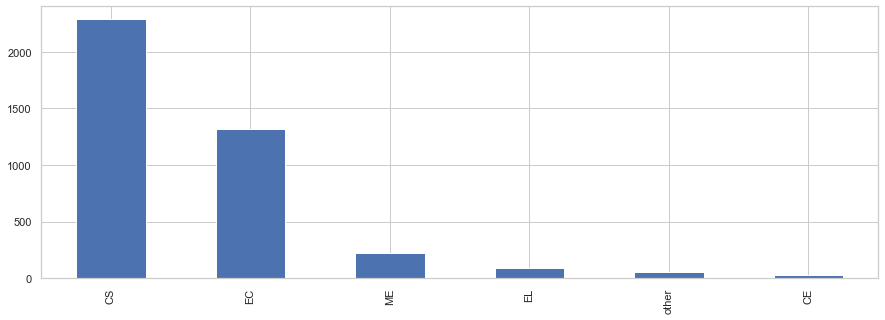

In [54]:
am_df['Specialization'] = am_df['Specialization'].map(specialization_map)

am_df['Specialization'].value_counts().plot(kind='bar', figsize=(15,5))

print(am_df['Specialization'].unique())

**Observation:**

There is positive correlation between salary and computer programming skills.

It is observed that CS department has many outliers indicating higher salaries are earned by those of CS specializaton.

The median salary of EC dept is higher than others.

In [55]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

**Lets make a bold Claim that Gender and Specialization are dependent.**

Step - 1: i.e. Alternate Hypothesis:$$ H_1: They \ are \ Dependent $$and Null Hypothesis:$$ H_0: They \ are \ Independent $$

Step - 2:

Collect the sample of size n
Compute the sample frequencies
Step - 3: Compute $ \chi^2 $ test statistic Now you need to check, if the difference in the observed and expected frequencies is too extreme to reject the NULL hypothesis.

Have a look at Observed Frequencies (in the sample)
Compute the Expected Frequencies (under null hyp assumption)$$ Expected \ Value = \frac{row \ total * col \ total}{grand \ total}$$Now, test statistic can be computed using below mentioned formula:$$ \chi^2 = \Sigma \frac{(o-e)^2}{e} $$
Step - 4: Decide $ \alpha $ and $ df = (rows-1)(cols-1) $

Step - 5: Apply decision rule

Chi Square Test

$$ if \ \chi^2 \gt \chi^2_{df, \alpha} \Rightarrow Reject H_0 $$

p-value Test:$$ p \ value = (1.0 - cdf(test \ statistic)) $$

Now,
$$ if (p \ value \lt \alpha) \Rightarrow Accept H_1 \ or \ Reject H_0 $$

In [57]:
#step 2-freqency distribution
pd.crosstab(am_df.Specialization, am_df.Gender, margins=True)

Gender,f,m,All
Specialization,,,
CE,6,23,29
CS,601,1688,2289
EC,306,1013,1319
EL,17,68,85
ME,12,208,220
other,15,41,56
All,957,3041,3998


In [58]:
# observed frequencies
observed = pd.crosstab(am_df['Specialization'], am_df['Gender'])
observed

Gender,f,m
Specialization,,
CE,6,23
CS,601,1688
EC,306,1013
EL,17,68
ME,12,208
other,15,41


In [59]:
# chi2_contigency returns chi2 test statistic, p-value, degree of freedoms, expected frequencies

chi2_contingency(observed)

(49.57240850719072,
 1.6950209831469836e-09,
 5,
 array([[   6.94172086,   22.05827914],
        [ 547.9172086 , 1741.0827914 ],
        [ 315.72861431, 1003.27138569],
        [  20.34642321,   64.65357679],
        [  52.66133067,  167.33866933],
        [  13.40470235,   42.59529765]]))

In [60]:
# Computing chi2 test statistic, p-value, degree of freedoms

chi2_test_stat = chi2_contingency(observed)[0]
pval = chi2_contingency(observed)[1]
df = chi2_contingency(observed)[2]

In [61]:
confidence_level = 0.90

alpha = 1 - confidence_level

chi2_critical = chi2.ppf(1 - alpha, df)

chi2_critical

9.236356899781123

In [ ]:
# Ploting the chi2 distribution to visualise

# Defining the x minimum and x maximum
x_min = 0
x_max = 100

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, df)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Setting Chi2 Critical value 
chi2_critical_right = chi2_critical

# Shading the right rejection region
x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, df)
plt.fill_between(x1, y1, color='cyan')

In [63]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


**Observation :**
    
The specialization and Gender are both dependent

**Conclusion:**

The given data set have 3998 rows × 39 columns.

The highest salary is 4000000 and average salary is 307699.850.

With Univariate analysis we understand the frequency distribution of each categorical Variable/Column and probability and frequency distribution of each numerical column.

With Binary analysis we discover the relationships between numerical columns and identify the patterns between categorical and numerical columns.

Using Research question we test the data

    Using one hot encoding we find that there is positive correlation between salary and computer programming skills.
    
    It is observed that CS department has many outliers indicating higher salaries are earned by those of CS specializaton.

    Using Chi - Square test it is observed that the specialization is dependent on Gender.